# Tutorial to run HOD models
Should work under cosmodesi 2025_03 environment 

In [2]:
from HODDIES import HOD

# Using abacus simulation at NERSC

In [3]:
# Initiate the HOD instance with default parameter file default_HOD_parameters.yaml

HOD_obj= HOD(param_file='../HODDIES/default_HOD_parameters.yaml', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')



Set number of threads to 32


Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...
Done took 00:00:22
Compute columns...
Done took  00:00:01
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:24
Initialize Abacus c000 cosmology


## - Different ways to give input parameters

If you want to use a custom parameter file:


```js
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
``` 
<br> 

You can pass a dictionnary :

```js
args = {'''pass any parameters with the same structure as the default yaml parameter file'''}
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')
```

You can also overwrite parameters if you provide **kwargs dict

```js
HOD_obj= HOD(args=args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
or
HOD_obj= HOD(param_file='my_custom_param_file', path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus', **{'ELG': {'Ac': 1}})
```

<br> 

## - Different ways to load halo catalogs 

Catalog types supported: `np.ndarray, mpytools.Catalog, dict`

Halo catalogs must contain at least these colunms: `['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id']`

Initialize the instance with a preloaded halo_catalog:

```js
HOD_obj= HOD(hcat_file=halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```

You can also pass the path of the halo catalog. Supported format are: `fits, h5, asdf`

```js
path_to_halo_catalog = '/path/to/halo_catalog'
HOD_obj= HOD(hcat_file=path_to_halo_catalog, **{'hcat': {'boxsize': 1000}}) # Need to provide boxsize 
```


In [4]:
# All parameters from the parameter file are set here
HOD_obj.args

{'tracers': ['LRG', 'ELG'],
 'LRG': {'HOD_model': 'SHOD',
  'Ac': 1,
  'log_Mcent': 12.75,
  'sigma_M': 0.5,
  'gamma': 1,
  'pmax': 1,
  'Q': 100,
  'satellites': True,
  'sat_HOD_model': 'Nsat_pow_law',
  'As': 1,
  'M_0': 12.5,
  'M_1': 13.5,
  'alpha': 1,
  'f_sigv': 1,
  'vel_sat': 'rd_normal',
  'v_infall': 0,
  'assembly_bias': {'c': [0, 0], 'env': [0, 0]},
  'conformity_bias': False,
  'exp_frac': 0,
  'exp_scale': 1,
  'nfw_rescale': 1,
  'density': 0.0007,
  'vsmear': 0},
 'hcat': {'Abacus': {'sim_name': 'AbacusSummit_highbase_c000_ph100',
   'load_particles': False,
   'halo_lc': False,
   'z_simu': 0.95},
  'Pinnochio': {'dir_sim': None},
  'boxsize': None,
  'path_to_sim': None,
  'path_to_part': None,
  'mass_cut': None,
  'z_simu': 0.95,
  'sim_name': 'AbacusSummit_highbase_c000_ph100',
  'load_particles': False,
  'halo_lc': False},
 '2PCF_settings': {'rsd': True,
  'bin_logscale': True,
  'mu_max': 1,
  'n_mu_bins': 101,
  'multipole_index': [0, 2],
  'n_r_bins': 25,
 

# Using a custom halo catalog

In [5]:
# You can define different tracers 
print('Tracers considered', HOD_obj.args['tracers'])

# You can define different tracers 
print(f"HOD model for {HOD_obj.args['tracers'][0]}: {HOD_obj.args[HOD_obj.args['tracers'][0]]['HOD_model']}")
print(f"HOD model for {HOD_obj.args['tracers'][1]}: {HOD_obj.args[HOD_obj.args['tracers'][1]]['HOD_model']}")

#  All HOD model for central galaxies are define in https://arxiv.org/abs/2306.06319
print('Central HOD model available:', 'SFHOD', 'SHOD', 'GHOD', 'HMQ', 'LNHOD','mHMQ')
print('Satelitte HOD model is the standard power law')

Tracers considered ['LRG', 'ELG']
HOD model for LRG: SHOD
HOD model for ELG: GHOD
Central HOD model available: SFHOD SHOD GHOD HMQ LNHOD mHMQ
Satelitte HOD model is the standard power law


In [6]:
# HOD parameters are set in dictionnary for each tracer 
print(HOD_obj.args['LRG'])
print(HOD_obj.args['ELG'])

{'HOD_model': 'SHOD', 'Ac': 1, 'log_Mcent': 12.75, 'sigma_M': 0.5, 'gamma': 1, 'pmax': 1, 'Q': 100, 'satellites': True, 'sat_HOD_model': 'Nsat_pow_law', 'As': 1, 'M_0': 12.5, 'M_1': 13.5, 'alpha': 1, 'f_sigv': 1, 'vel_sat': 'rd_normal', 'v_infall': 0, 'assembly_bias': {'c': [0, 0], 'env': [0, 0]}, 'conformity_bias': False, 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'density': 0.0007, 'vsmear': 0}
{'Ac': 0.05, 'As': 0.11, 'HOD_model': 'GHOD', 'sat_HOD_model': 'Nsat_pow_law', 'M_0': 11.63, 'M_1': 11.7, 'Q': 100, 'alpha': 0.6, 'assembly_bias': {'c': [0, 0]}, 'conformity_bias': False, 'density': 0.001, 'f_sigv': 1, 'gamma': 1, 'log_Mcent': 11.63, 'pmax': 0.1, 'satellites': True, 'sigma_M': 0.12, 'vel_sat': 'rd_normal', 'exp_frac': 0, 'exp_scale': 1, 'nfw_rescale': 1, 'v_infall': 0, 'vsmear': 0}


In [7]:
# Create galaxy mock catalog, First evaluation is slower because it needs to compile jit functions

cats = HOD_obj.make_mock_cat(fix_seed=None) #return 1 catalogue per tracer 
cat_elg = HOD_obj.make_mock_cat(tracers='ELG') 
cats, cat_elg 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 14.001631498336792
Start satellite assignement


/global/u1/a/arocher/Code/postdoc/HOD/Dev/HODDIES/HODDIES/utils.py:499: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see https://numba.readthedocs.io/en/stable/user/parallel.html#diagnostics for help.

File "../HODDIES/utils.py", line 415:
@njit(fastmath=True)
def get_etavir_nfw(c): 
^

  etaVir = get_etavir_nfw(c[i])*nfw_rescale
/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, v

Satellite assignement done 6.063337087631226
LRG mock catalogue done 6.175443887710571
561152 central galaxies, 137128 satellites, fraction of satellite 0.20 
Done overall time  LRG 21.411154985427856
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 12.523815155029297
Start satellite assignement
Satellite assignement done 0.5676994323730469
ELG mock catalogue done 0.7102358341217041
445623 central galaxies, 554690 satellites, fraction of satellite 0.55 
Done overall time  ELG 28.203632593154907


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


Create mock catalog for ['ELG']
Run HOD for ELG
Set density to 0.001 gal/Mpc/h
HOD Computed 0.39044857025146484
Start satellite assignement
Satellite assignement done 0.4800231456756592
ELG mock catalogue done 0.6293148994445801
446331 central galaxies, 552885 satellites, fraction of satellite 0.55 
Done overall time  ELG 1.6960968971252441


(Catalog(csize=1698593, size=1698593, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']),
 Catalog(csize=999216, size=999216, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER']))

In [8]:
# By default the code automatically fix the density
print('Density fixed to ', HOD_obj.args['ELG']['density'], 'ELG catalogue size:', cat_elg.size)
print('Remove density constrain')

HOD_obj.args['ELG']['density'] = False
cat_elg_nodens = HOD_obj.make_mock_cat(tracers='ELG') 
print('ELG catalogue size without density constrain:', cat_elg_nodens.size)


Density fixed to  0.001 ELG catalogue size: 999216
Remove density constrain
Create mock catalog for ['ELG']
Run HOD for ELG
No density set
HOD Computed 0.35947656631469727
Start satellite assignement
Satellite assignement done 1.0593645572662354
ELG mock catalogue done 1.4331960678100586
1031184 central galaxies, 1283548 satellites, fraction of satellite 0.55 
Done overall time  ELG 2.4382190704345703
ELG catalogue size without density constrain: 2314732


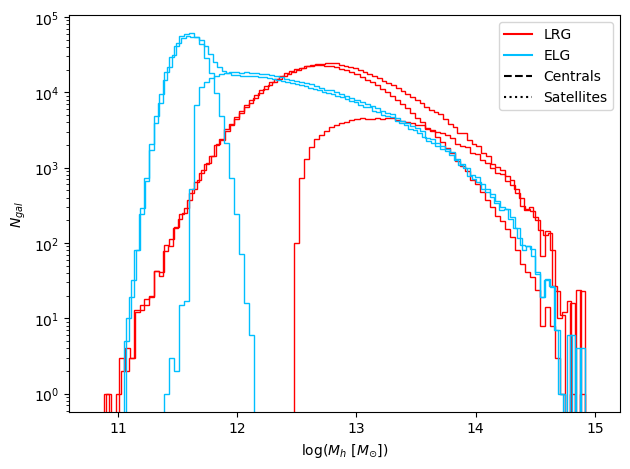

In [9]:
#Plot Halo mass function 

HOD_obj.plot_HMF(cats, show_sat=True)


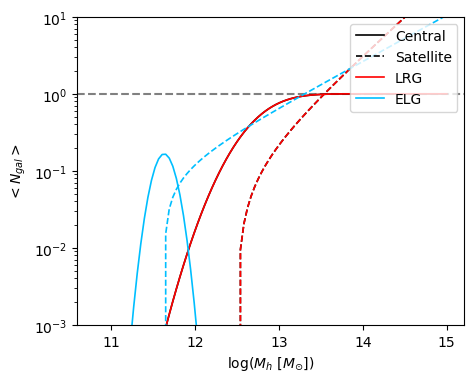

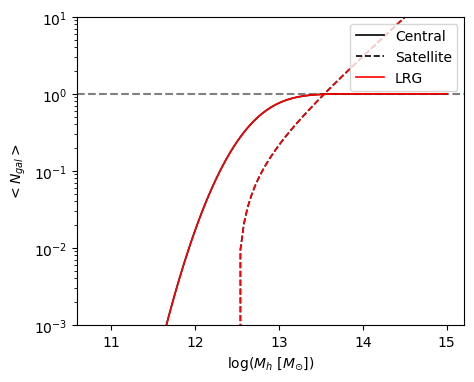

In [10]:
#Plot HOD model
HOD_obj.HOD_plot()
HOD_obj.HOD_plot(tracer='LRG')


In [11]:
# 2PCF settings 
HOD_obj.args['2PCF_settings'] # if edges_rppi/smu are None it will take the rp_min/max 

{'rsd': True,
 'bin_logscale': True,
 'mu_max': 1,
 'n_mu_bins': 101,
 'multipole_index': [0, 2],
 'n_r_bins': 25,
 'n_rp_bins': 25,
 'rmax': 30,
 'rmin': 0.01,
 'rp_max': 30,
 'rp_min': 0.01,
 'edges_rppi': None,
 'edges_smu': None,
 'los': 'z',
 'pimax': 40}

In [12]:
#compute clustering for 1 tracer, it apply rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')

#Compute wp for ELG...


Done in 1.286 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 0.895 s


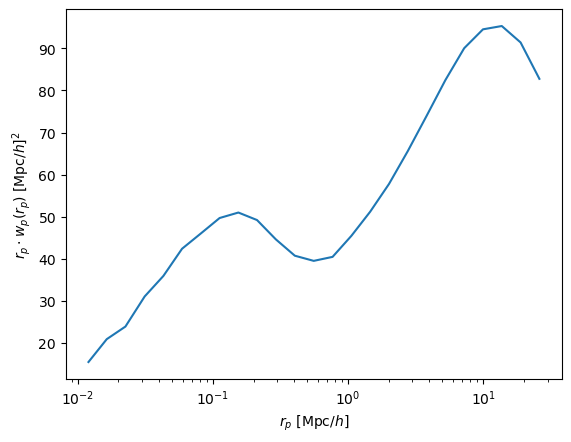

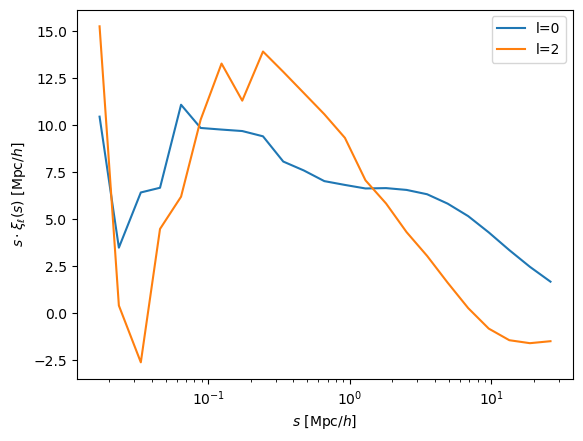

In [13]:
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [14]:
# Create galaxy mock catalog with different seed
import numpy as np 
cat_elg = [HOD_obj.make_mock_cat(fix_seed=ii, tracers='ELG', verbose=False) for ii in np.random.randint(0,2**32, size=10)]


/global/common/software/desi/users/adematti/perlmutter/cosmodesiconda/20250331-1.0.0/conda/lib/python3.10/site-packages/numba/parfors/parfor.py:2395: NumbaPerformanceWarning: 
prange or pndindex loop will not be executed in parallel due to there being more than one entry to or exit from the loop (e.g., an assertion).

File "../HODDIES/utils.py", line 487:
def compute_fast_NFW(x_h, y_h, z_h, vx_h, vy_h, vz_h, c, M, Rvir, rd_pos, rd_vel, exp_frac=0, exp_scale=1, nfw_rescale=1, vrms_h=None, f_sigv=None, v_infall=None, vel_sat='NFW', Nthread=32, seed=None):
    <source elided>
    hstart = np.rint(np.linspace(0, x_h.size, Nthread + 1))
    for tid in numba.prange(Nthread):
    ^

  warnings.warn(


#Compute wp for ELG...


Done in 0.553 s
#Compute wp for ELG...
Done in 0.542 s
#Compute wp for ELG...
Done in 0.575 s
#Compute wp for ELG...
Done in 0.531 s
#Compute wp for ELG...
Done in 0.522 s
#Compute wp for ELG...
Done in 0.524 s
#Compute wp for ELG...
Done in 0.533 s
#Compute wp for ELG...
Done in 0.530 s
#Compute wp for ELG...
Done in 0.539 s
#Compute wp for ELG...
Done in 0.549 s


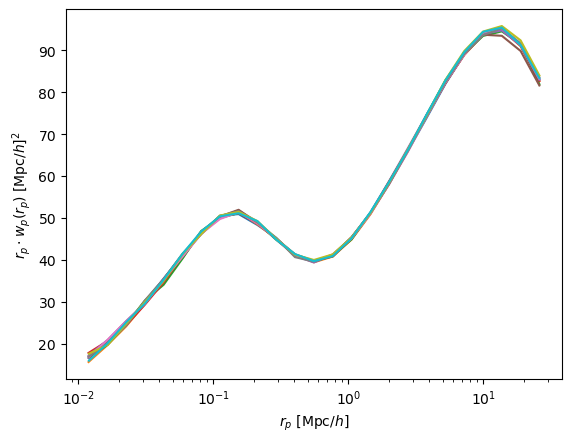

#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.499 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.396 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 2.552 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.369 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.275 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.274 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.267 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.239 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.207 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.253 s


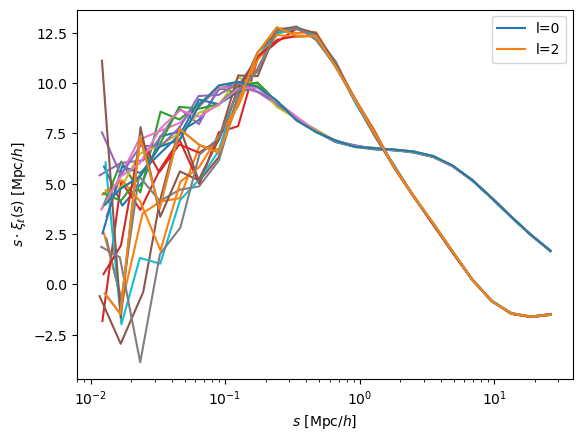

In [15]:
for cat in cat_elg:
    rp, wp = HOD_obj.get_wp(cat, tracers='ELG')
    plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()

for cat in cat_elg:
    s, xi = HOD_obj.get_2PCF(cat, tracers='ELG')
    plt.plot(s,s*xi[0])
    plt.plot(s,s*xi[1])
plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

# Use particles for satelittes instead of NFW

In [16]:
# Initiate the HOD instance with default parameter file parameters_HODdefaults.yaml
HOD_obj.args['use_particles'] = True
HOD_obj.args['hcat']['load_particles'] = True

HOD_obj_part= HOD(args=HOD_obj.args, path_to_abacus_sim='/global/cfs/cdirs/desi/cosmosim/Abacus')


Set number of threads to 32
Load Compaso cat from /global/cfs/cdirs/desi/cosmosim/Abacus/AbacusSummit_highbase_c000_ph100/halos/z0.950 ...


Done took 00:00:18
Compute columns...
Done took  00:00:00
AbacusSummit_highbase_c000_ph100 at 0.95 loaded, took 00:00:18
Initialize Abacus c000 cosmology


In [17]:
HOD_obj_part.hcat

Catalog(csize=48548940, size=48548940, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id'])

In [ ]:
#First run need to compile jit functions
# If not enough particles are found, automatically switch to NFW
# Need lot of memory to run with particles
cats = HOD_obj_part.make_mock_cat('LRG',fix_seed=None) 
cats 

Create mock catalog for ['LRG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 0.3950948715209961
Start satellite assignement
Satellite assignement done 0.1264820098876953
LRG mock catalogue done 0.22547173500061035
561858 central galaxies, 137213 satellites, fraction of satellite 0.20 
Done overall time  LRG 1.1516425609588623


Catalog(csize=699071, size=699071, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

In [28]:
#Second run is faster
cats = HOD_obj_part.make_mock_cat(fix_seed=None)
cats 

Create mock catalog for ['LRG', 'ELG']
Run HOD for LRG
Set density to 0.0007 gal/Mpc/h
HOD Computed 1.2830626964569092
Start satellite assignement
Satellite assignement done 0.12139248847961426
LRG mock catalogue done 0.21996045112609863
562099 central galaxies, 136720 satellites, fraction of satellite 0.20 
Done overall time  LRG 2.142631769180298
Run HOD for ELG
No density set
HOD Computed 1.2829337120056152
Start satellite assignement
Satellite assignement done 1.1446421146392822
ELG mock catalogue done 1.5795376300811768
1031581 central galaxies, 1281420 satellites, fraction of satellite 0.55 
Done overall time  ELG 4.780824899673462


Catalog(csize=3011820, size=3011820, columns=['x', 'y', 'z', 'vx', 'vy', 'vz', 'Rs', 'Rh', 'c', 'Mh', 'log10_Mh', 'Vrms', 'halo_id', 'Central', 'TRACER'])

#Compute wp for ELG...


Done in 0.506 s
#Compute xi(s,mu) using l=[0, 2] for ELG...
#Done in 1.190 s


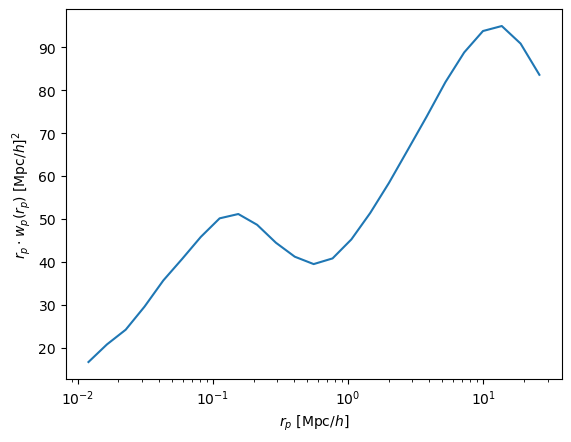

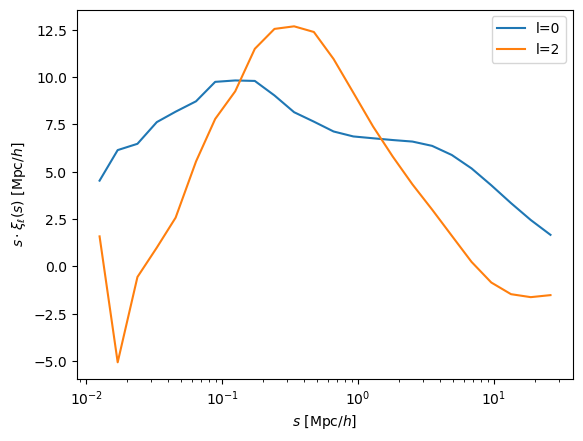

In [29]:
#compute clustering for 1 tracer, it applies rsd following the los parameter

rp, wp = HOD_obj.get_wp(cats, tracers='ELG')
s, xi = HOD_obj.get_2PCF(cats, tracers='ELG')
#Plot 2PCF 
import matplotlib.pyplot as plt

plt.plot(rp,rp*wp)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()


plt.plot(s,s*xi[0], label='l=0')
plt.plot(s,s*xi[1], label='l=2')

plt.xscale('log')
plt.xlabel('$s$ [$\mathrm{{Mpc}}/h$]')
plt.ylabel(r'$s \cdot \xi_{\ell}(s)$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.show()

In [30]:
cross_corr = HOD_obj_part.get_crosswp(cats, tracers=['ELG', 'LRG'], verbose=True)

#Compute wp for ['ELG' 'ELG']...
#Done in 1.009 s
#Compute wp for ['ELG' 'LRG']...
#Done in 0.596 s
#Compute wp for ['LRG' 'LRG']...
#Done in 0.289 s


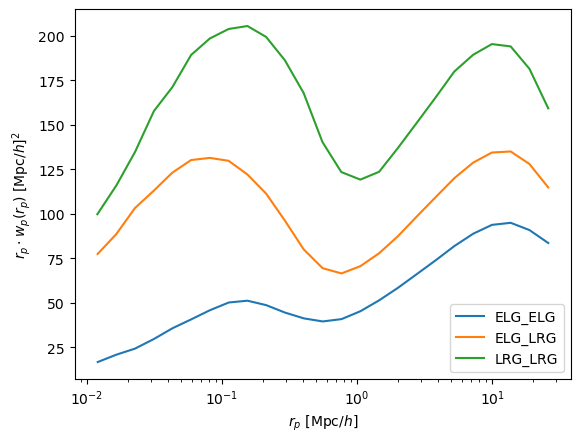

In [31]:
for tr, (rp, wp) in zip(cross_corr.keys(), cross_corr.values()):
    plt.plot(rp,rp*wp, label=tr)
plt.xscale('log')
plt.xlabel('$r_p$ [$\mathrm{{Mpc}}/h$]')
plt.legend()
plt.ylabel(r'$r_p \cdot w_p(r_p)$ [$\mathrm{{Mpc}}/h$]$^2$')
plt.show()